In [1]:
# Import necessary libraries for data manipulation, machine learning, and plotting

# Numerical operations and matrix manipulation
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Scikit-learn library for machine learning tasks
import sklearn

# SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer

# StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pipeline for creating a sequence of data processing steps
from sklearn.pipeline import Pipeline

# ColumnTransformer for applying different preprocessing steps to different feature subsets
from sklearn.compose import ColumnTransformer

# Linear regression model
from sklearn.linear_model import LinearRegression

# Support Vector Regressor model
from sklearn.svm import SVR

# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score

# Learning curve function to understand model performance with varying training sizes
from sklearn.model_selection import learning_curve

# DatetimeFeatures for extracting datetime features
from feature_engine.datetime import DatetimeFeatures

# XGBoost Regressor model
from xgboost import XGBRegressor

# Joblib for saving and loading models
import joblib

# Matplotlib for plotting data visualizations
import matplotlib.pyplot as plt


In [2]:
# Set the display option in pandas to show all columns when printing a DataFrame
pd.set_option("display.max_columns", None)


In [3]:
# Configure scikit-learn to output transformations as pandas DataFrames
sklearn.set_config(transform_output="pandas")


In [4]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
val_df=pd.read_csv("data/val.csv")

In [5]:
train_df.sample(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
54,Air India,2019-03-24,Banglore,New Delhi,17:00:00,22:55:00,1795,2.0,No Info,8114
141,Multiple Carriers,2019-05-09,Delhi,Cochin,17:45:00,01:30:00,465,1.0,No Info,9021
565,Vistara,2019-04-18,Banglore,Delhi,17:00:00,19:35:00,155,0.0,No Info,5613
238,Jet Airways,2019-06-03,Delhi,Cochin,15:00:00,19:00:00,1680,1.0,In-flight meal not included,10262
412,Vistara,2019-04-27,Banglore,Delhi,07:00:00,09:40:00,160,0.0,No Info,5613


In [6]:
test_df.sample(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
143,Spicejet,2019-04-24,Kolkata,Banglore,17:10:00,19:40:00,150,0.0,No check-in baggage included,3841
23,Multiple Carriers,2019-03-03,Delhi,Cochin,10:20:00,01:35:00,915,1.0,No Info,15147
3,Air India,2019-03-24,Kolkata,Banglore,16:50:00,18:30:00,1540,1.0,No Info,14641
82,Jet Airways,2019-06-27,Delhi,Cochin,10:00:00,19:00:00,540,1.0,In-flight meal not included,10262
93,Goair,2019-04-27,Banglore,Delhi,07:45:00,10:40:00,175,0.0,No Info,5048


In [7]:
val_df.sample(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
30,Indigo,2019-05-01,Kolkata,Banglore,06:20:00,10:20:00,240,1.0,No Info,4226
111,Jet Airways,2019-03-06,Mumbai,Hyderabad,17:50:00,16:50:00,1380,2.0,No Info,20845
140,Indigo,2019-04-21,Banglore,Delhi,18:55:00,21:50:00,175,0.0,No Info,4823
158,Jet Airways,2019-03-01,Banglore,New Delhi,22:50:00,00:45:00,1555,1.0,No Info,26890
89,Indigo,2019-05-21,Delhi,Cochin,05:05:00,12:10:00,425,1.0,No Info,6818


In [8]:
def split_data(data):
    # Drop the target column 'price' to create the feature set X
    X = data.drop(columns="price")
    
    # Create the target set y by copying the 'price' column
    y = data.price.copy()
    
    # Return the features and target as a tuple
    return (X, y)


In [9]:
X_train,y_train=split_data(train_df)
X_val,y_val=split_data(val_df)
X_test,y_test=split_data(test_df)

In [10]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info


In [11]:
y_train

0       4995
1       8372
2       6117
3       7770
4       9187
       ...  
635     4282
636    13067
637     4423
638     7670
639    10844
Name: price, Length: 640, dtype: int64

## Data Preprocessing

In [12]:
# List of columns containing datetime information
dt_cols = ["date_of_journey", "dep_time", "arrival_time"]

# List of columns containing numerical features
num_cols = ["duration", "total_stops"]

# List of columns containing categorical features
cat_cols = ["airline", "source", "destination", "additional_info"]


In [13]:
# Pipeline for transforming numerical features
num_transformer = Pipeline(steps=[
    # Impute missing values with the median value of each column
    ("imputer", SimpleImputer(strategy="median")),
    # Standardize features by removing the mean and scaling to unit variance
    ("scaler", StandardScaler())
])

# Pipeline for transforming categorical features
cat_transformer = Pipeline(steps=[
    # Impute missing values with the most frequent value of each column
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # Encode categorical features as a one-hot numeric array
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Pipeline for transforming 'date_of_journey' feature
doj_transformer = Pipeline(steps=[
    # Impute missing values with the most frequent value
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # Extract datetime features: month, week, day of week, and day of month
    ("extractor", DatetimeFeatures(features_to_extract=["month", "week", "day_of_week", "day_of_month"], format="mixed")),
    # Standardize extracted features
    ("scaler", StandardScaler())
])

# Pipeline for transforming 'dep_time' and 'arrival_time' features
time_transformer = Pipeline(steps=[
    # Impute missing values with the most frequent value
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # Extract datetime features: hour and minute
    ("extractor", DatetimeFeatures(features_to_extract=["hour", "minute"], format="mixed")),
    # Standardize extracted features
    ("scaler", StandardScaler())
])


In [14]:
# Combine the preprocessing pipelines for different types of features into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    # Apply the num_transformer to numerical columns
    ("num", num_transformer, num_cols),
    # Apply the cat_transformer to categorical columns
    ("cat", cat_transformer, cat_cols),
    # Apply the doj_transformer to the 'date_of_journey' column
    ("doj", doj_transformer, ["date_of_journey"]),
    # Apply the time_transformer to the 'dep_time' and 'arrival_time' columns
    ("time", time_transformer, ["dep_time", "arrival_time"])
])


In [15]:
# Dictionary to store different machine learning algorithms
algorithms = {
    # Linear Regression model
    "Linear Regression": LinearRegression(),
    
    # Support Vector Regressor model
    "Support Vector Machine": SVR(),
    
    # Random Forest Regressor model with 10 estimators (trees)
    "Random Forest": RandomForestRegressor(n_estimators=10),
    
    # XGBoost Regressor model with 10 estimators (trees)
    "XG Boost": XGBRegressor(n_estimators=10)
}


In [16]:
# Concatenate the training and validation DataFrames along the rows
data = pd.concat([train_df, val_df], axis=0)

# Split the concatenated DataFrame into features (X_data) and target (y_data)
X_data, y_data = split_data(data)

# Print the shapes of the feature set and target set
print(X_data.shape, y_data.shape)


(800, 9) (800,)


In [17]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
    """
    Plot learning curves with mean scores and standard deviation.

    Parameters:
    sizes (array-like): The sizes of the training dataset used to generate the learning curve.
    mean_scores (array-like): The mean scores (e.g., accuracy or R^2) corresponding to each training size.
    std_scores (array-like): The standard deviations of the scores.
    label (str): The label for the curve (e.g., the model name).
    ax (matplotlib.axes.Axes): The matplotlib Axes object to plot on.

    Returns:
    None
    """
    # Plot the mean scores with marker "o" and label the curve
    ax.plot(
        sizes,
        mean_scores,
        marker="o",
        label=label
    )

    # Fill the area between (mean_scores - std_scores) and (mean_scores + std_scores) to show the variability
    ax.fill_between(
        x=sizes,
        y1=mean_scores - std_scores,
        y2=mean_scores + std_scores,
        alpha=0.5  # Transparency of the fill
    )


In [18]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
    """
    Plot learning curves for a given machine learning algorithm.

    Parameters:
    name (str): The name of the model to be used in the plot title and legend.
    algorithm (object): The machine learning algorithm (e.g., LinearRegression, SVR).
    figsize (tuple): The size of the plot figure (default is (12, 4)).

    Returns:
    None
    """
    # Create a pipeline that first applies preprocessing, then fits the algorithm
    model = Pipeline(steps=[
        ("pre", preprocessor),
        ("alg", algorithm)
    ])

    # Calculate learning curves using cross-validation
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_data,
        y=y_data,
        cv=3,                # 3-fold cross-validation
        scoring="r2",        # Use R-squared as the scoring metric
        n_jobs=-1,           # Use all available CPU cores
        random_state=42      # Ensure reproducibility
    )

    # Compute mean and standard deviation of training scores
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

    # Compute mean and standard deviation of testing scores
    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    # Create a figure and axis object for plotting
    fig, ax = plt.subplots(figsize=figsize)

    # Plot training learning curve
    plot_curves(
        train_sizes,
        mean_train_scores,
        std_train_scores,
        f"Train ({train_score})",
        ax
    )

    # Plot testing learning curve
    plot_curves(
        train_sizes,
        mean_test_scores,
        std_test_scores,
        f"Test ({test_score})",
        ax
    )

    # Set plot labels and title
    ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

    # Add legend to the plot
    ax.legend(loc="lower right")

    # Display the plot
    plt.show()


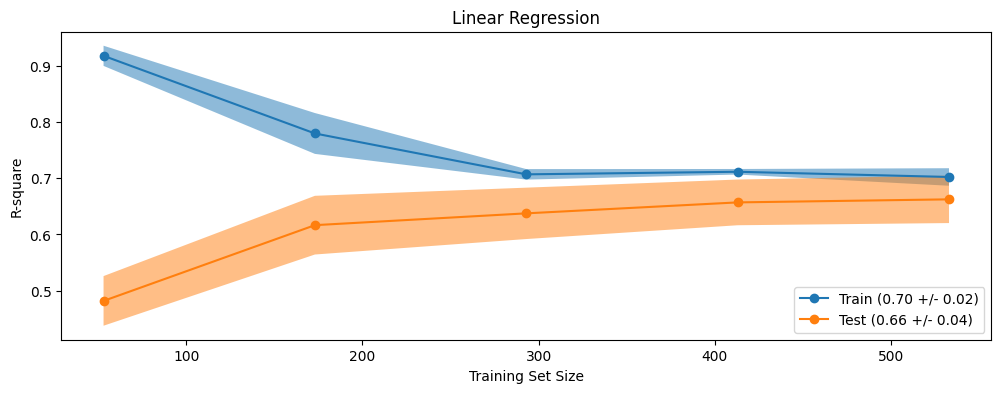

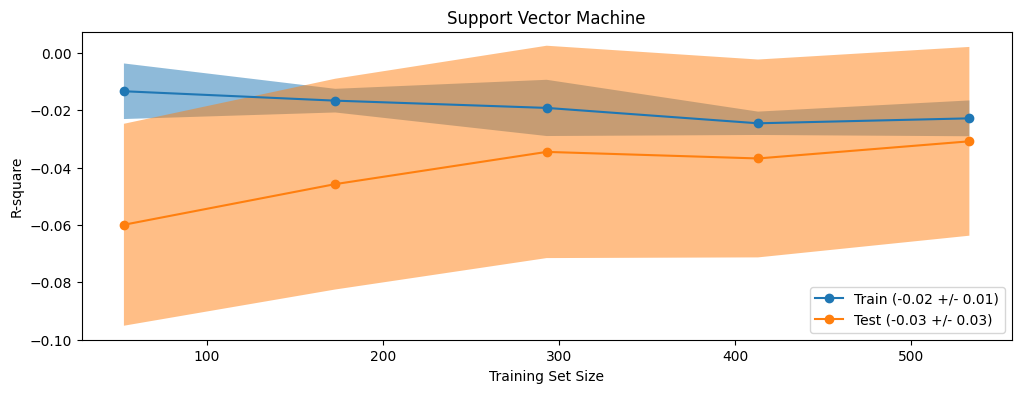

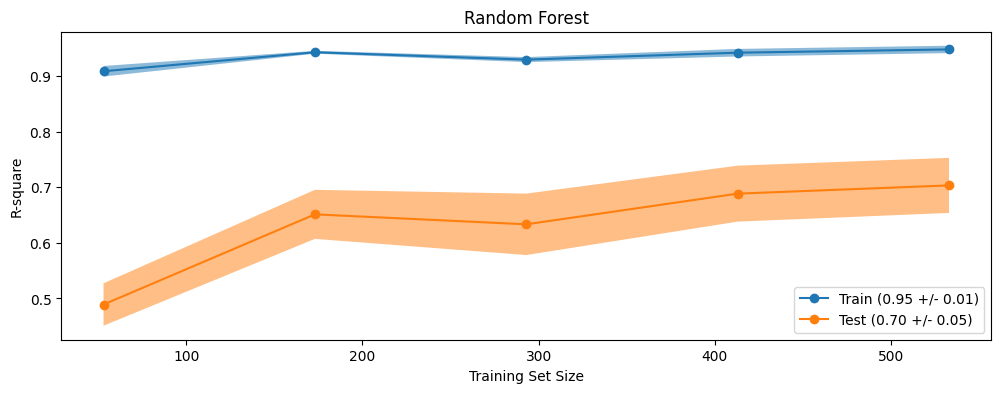

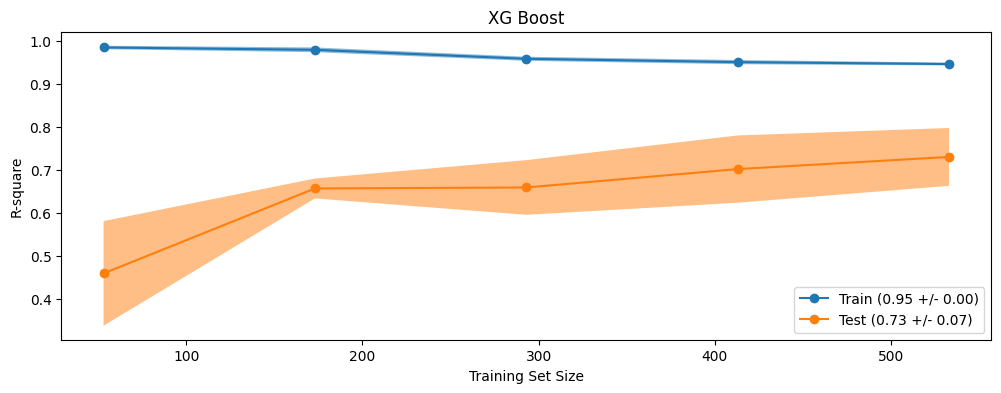

In [19]:
# Iterate over each algorithm in the dictionary and plot its learning curve
for name, alg in algorithms.items():
    plot_learning_curves(name, alg)


In [20]:
# Create a pipeline that combines preprocessing and a Random Forest Regressor
model = Pipeline(steps=[
    # Apply the preprocessor to the data
    ("pre", preprocessor),
    
    # Fit a Random Forest Regressor with 10 estimators (trees)
    ("rf", RandomForestRegressor(n_estimators=10))
])


In [21]:
# Fit the pipeline model to the entire dataset
model.fit(X_data, y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   '...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [22]:
def evaluate_model(X, y):
    """
    Evaluate the trained model's performance using R-squared (R^2) score.

    Parameters:
    X (pd.DataFrame or np.array): Features for prediction.
    y (pd.Series or np.array): True target values.

    Returns:
    float: R-squared score indicating the goodness of fit of the model.
    """
    # Predict the target values using the trained model
    y_pred = model.predict(X)
    
    # Calculate the R-squared score between true and predicted values
    r2 = r2_score(y, y_pred)
    
    # Return the R-squared score
    return r2


In [23]:
print(f"R2 score on Training data is = {evaluate_model(X_data, y_data)}")

R2 score on Training data is = 0.9499424464251672


In [24]:
print(f"R2 score on Test data is = {evaluate_model(X_test, y_test)}")

R2 score on Test data is = 0.6917486235302066


In [25]:
# Serialize the trained model to a file named "model.joblib"
joblib.dump(model, "model.joblib")


['model.joblib']

In [26]:
# Load the trained model from the "model.joblib" file
saved_model = joblib.load("model.joblib")
saved_model
# Now you can use the saved_model object for prediction or evaluation
# For example, you can use saved_model.predict(X_test) to make predictions on new data


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   '...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [27]:
# Make predictions using the saved_model
y_pred = saved_model.predict(X_test)

# Calculate the R-squared score to evaluate the model's performance
r2 = r2_score(y_test, y_pred)

# Print or use the R-squared score as needed
print(f"R-squared score on test data: {r2:.2f}")

R-squared score on test data: 0.69
